In [4]:
import scipy.integrate as inte 
import numpy as np 
import scipy.optimize as op
import math 
import matplotlib.pyplot as plt
import corner

Crear datos aleatoriamente

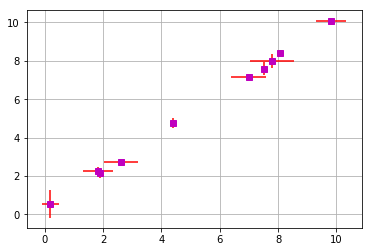

In [18]:
Num= 10 #numero de datos
C_i= 0. #cota inferior
C_s= 10. #Cota superior

a = np.random.uniform(C_i, C_s, Num)
x=sorted(a)
d = np.random.uniform(0.0,0.5,len(a))
y = x+d
# para sus barras de error
x_e=np.random.normal(0.1,0.4,len(x))
y_e=np.random.normal(0.1,0.4,len(y))
# graficar
plt.plot(x,y,'o',color='b')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.grid(True)

In [ ]:
Ajuste de minimos cuadrados

Con los daatos siguientes;
Valores de x: [0.19537913601221035, 1.8260559752255467, 1.8840443181924738, 2.614155953514744, 4.38323448529811, 6.986059964219611, 7.519426056739135, 7.783836484028809, 8.061379981725679, 9.82207883212446]
Valores de y: [ 0.5414051   2.23791162  2.15020682  2.71113687  4.75897644  7.13585631
  7.57431816  7.98910032  8.39823097 10.06670237]
-----------------------------------------------
Obtenamos la recta siguiente;
Pendiente real: 0.9868147873718367
Ordenada real: 0.31616371215061706


<function matplotlib.pyplot.show(*args, **kw)>

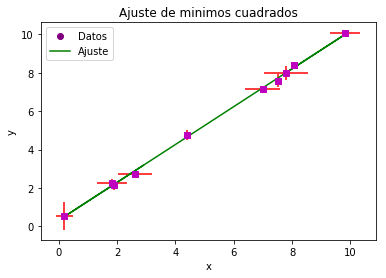

In [68]:
x2 = [(dato)**2 for dato in x]
xs=sum(x)
xss=sum(x2)

y2 = [(dato)**2 for dato in y]
ys=sum(y)
yss=sum(y2)
xy=0 
count = 0
while count < len(x):
         s=x[count]*y[count]
         xy=s+xy
         count=count+1

b=(ys*xss-xs*xy)/(len(x)*xss-xs*xs)
m=(len(x)*xy-xs*ys)/(len(x)*xss-xs*xs)


print("Con los daatos siguientes;")
print("Valores de x:",x)
print ("Valores de y:",y)
print("-----------------------------------------------")
print("Obtenamos la recta siguiente;")
print("Pendiente real:",m)
print("Ordenada real:",b)


xx=np.random.uniform(min(x),max(x),1000)
plt.plot(x,y,'o',label='Datos',color='purple')
plt.plot(xx,m*xx+b,label='Ajuste',color='green')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de minimos cuadrados')
plt.legend()
plt.show

In [84]:
print(m,b)

0.9868147873718367 0.31616371215061706


In [113]:
#valores reales

a_real=m
b_real=b

#Desviacion del valor real
c=1
#valores para priors
a_inf=m-c
a_sup=m+c
b_inf=b-c
b_sup=b+c

In [114]:

# Función a ajustar# Funció 
def f(x,a,b):
    return a*x+b

# Definimos el ln de los prior
#def lnprior(a,b):
#    if ((a_inf<a<a_sup) and (b_inf<b<b_sup)):
#        return 0.
#    else:
#        return -np.infty
#    return


#Definimos el Likelihood
def lnlike(x):
    a,b=x
    suma=0.0    
    if (a>a_sup) or (a<a_inf):
        return -np.infty
    if (a>b_sup) or (a<b_inf):
        return -np.infty
    evalu=f(x,a,b)
    for i in range (0,len(x)):
        suma+=-0.5*(((evalu[i]-y[i])/y_e[i]**2)**2)
    return suma

In [115]:
ndim,nwalkers=2,10
p0=[np.random.rand(ndim) for i in range (nwalkers)]
sampler=emcee.EnsembleSampler(nwalkers,ndim,lnlike)
results=sampler.run_mcmc(p0,10000)

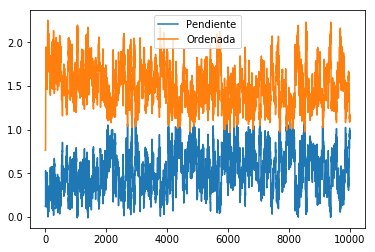

In [116]:
#plot del caminante 1, en ambos parámetros

plt.plot(sampler.chain[1,:,0],label='Pendiente')
plt.plot(sampler.chain[1,:,1],label='Ordenada')
plt.legend()

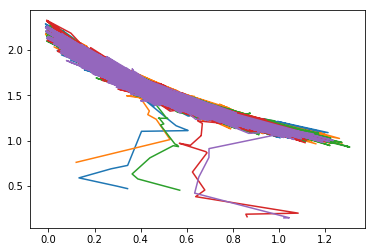

In [117]:
#gráfica de diferentes caminantes en el espacio de parámetros
plt.plot(sampler.chain[0,:,0], sampler.chain[0,:,1])
plt.plot(sampler.chain[1,:,0], sampler.chain[1,:,1])
plt.plot(sampler.chain[5,:,0], sampler.chain[5,:,1])
plt.plot(sampler.chain[7,:,0], sampler.chain[7,:,1])
plt.plot(sampler.chain[9,:,0], sampler.chain[9,:,1])


In [118]:
sampler.flatchain

array([[0.34332025, 0.47254826],
       [0.29972571, 0.49857569],
       [0.13255237, 0.59090598],
       ...,
       [0.47146101, 1.45325927],
       [0.52440762, 1.41556528],
       [0.52440762, 1.41556528]])

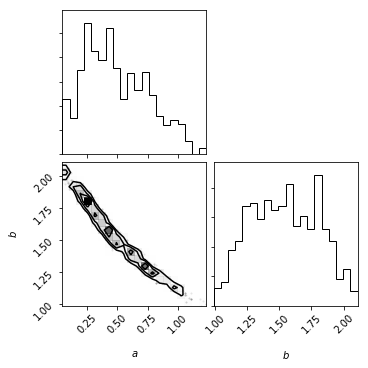

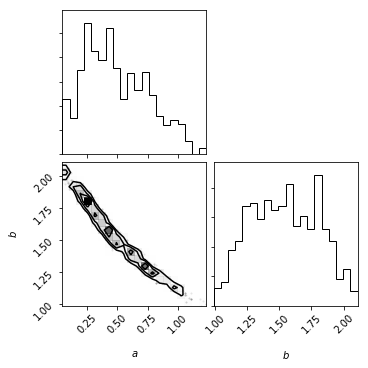

In [121]:
np.shape(sampler.flatchain)
corner.corner(sampler.flatchain[-1000:],labels=["$a$", "$b$"])

In [1]:
#samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
#fig = corner.corner(samples, labels=["$a$", "$b$"], truths=[b, m])